In [5]:
with open('accounts.txt', mode='w') as accounts:
    accounts.write('100 Jones 24.98\n')
    accounts.write('200 Doe 345.67\n')
    accounts.write('300 White 0.00\n')
    accounts.write('400 Stone -42.16\n')
    accounts.write('500 Rich 224.62\n')

The with statement implicity releases resources when its suite finishes executing.

Its good practice to close resources as soon as the program no longer needs them. 

In [3]:
with open('grades.txt', mode='w') as grades:
    grades.write('1 Red A\n')
    grades.write('2 Green B\n')
    grades.write('3 White A\n')

In [6]:
with open('accounts.txt', mode='r') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    for record in accounts:
        account, name, balance = record.split()
        print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White           0.00
400       Stone         -42.16
500       Rich          224.62


A file object's seek method can be used to repositon the file-position pointer. 

By default, iterating through a file object with a for statement reads one line at a time from the file and returns it as a string. 

In [7]:
with open('grades.txt', mode='r') as grades:
    print(f'{"ID":<4}{"Name":<7}{"Grade"}')
    for record in grades:
        student_id, name, grade = record.split()
        print(f'{student_id:<4}{name:<7}{grade}')

ID  Name   Grade
1   Red    A
2   Green  B
3   White  A


In [12]:
accounts = open('accounts.txt', 'r')

In [13]:
temp_file = open('temp_file.txt', 'w')

In [14]:
with accounts, temp_file:
    for record in accounts:
        account, name, balance = record.split()
        if account!= '300':
            temp_file.write(record)
        else:
            new_record = ' '.join([account, 'Williams', balance])
            temp_file.write(new_record + '\n')

In [16]:
import os

In [17]:
os.remove('accounts.txt')

In [19]:
os.rename('temp_file.txt', 'accounts.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'temp_file.txt' -> 'accounts.txt'

[19] Was re-run - ran fine 1x and then run again which then provided the above error, which makes sense as the file was no longer there to rename.

The os module's remove and rename functions delete a file and specify a new name for a file, respectively. 

Formatted data in a text file can not be modified without the risk of destroying other data in the file, because records and their fields can vary in size. 

In [20]:
accounts = open('accounts.txt', 'r')

In [22]:
temp_file = open('temp_file.txt', 'w')

In [23]:
with accounts, temp_file:
    for record in accounts:
        account, name, balance = record.split()
        if name != 'Doe':
            temp_file.write(record)
        else:
            new_record = ' '.join([account, 'Smith', balance])
            temp_file.write(new_record + '\n')

In [24]:
import os

In [25]:
os.remove('accounts.txt')

In [27]:
os.rename('temp_file.txt', 'accounts.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'temp_file.txt' -> 'accounts.txt'

[27] Was re-run - ran fine 1x and then run again which then provided the above error, which makes sense as the file was no longer there to rename. (need to check directory before hitting "Run" again) 

In [37]:
accounts_dict = {'accounts': [
    {'account': 100, 'name': 'Jones', 'balance': 24.98},
    {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [29]:
import json

In [38]:
with open('accounts.json', 'w') as accounts:
    json.dump(accounts_dict, accounts)

In [39]:
with open('accounts.json', 'r') as accounts:
    accounts_json = json.load(accounts)

In [40]:
accounts_json

{'accounts': [{'account': 100, 'name': 'Jones', 'balance': 24.98},
  {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [41]:
accounts_json['accounts']

[{'account': 100, 'name': 'Jones', 'balance': 24.98},
 {'account': 200, 'name': 'Doe', 'balance': 345.67}]

In [42]:
accounts_json['accounts'][0]

{'account': 100, 'name': 'Jones', 'balance': 24.98}

In [43]:
accounts_json['accounts'][1]

{'account': 200, 'name': 'Doe', 'balance': 345.67}

In [44]:
accounts_json['accounts'][1]

{'account': 200, 'name': 'Doe', 'balance': 345.67}

In [45]:
with open('accounts.json', 'r') as accounts: 
    print(json.dumps(json.load(accounts), indent=4))

{
    "accounts": [
        {
            "account": 100,
            "name": "Jones",
            "balance": 24.98
        },
        {
            "account": 200,
            "name": "Doe",
            "balance": 345.67
        }
    ]
}


Converting objects to JSON text format is known as serialization and reconstructing the original Python object from the JSON text is known as deserialization. 

JSON is both a human-readable and computer-readable format that makes it convenient to send and receive objects across the Internet. 

In [47]:
import json

In [48]:
grades_dict = {'gradebook':
               [{'student_id': 1, 'name': 'Red', 'grade': 'A'},
                {'student_id': 2, 'name': 'Green', 'grade': 'B'},
                {'student_id': 3, 'name': 'White', 'grade': 'A'}]}

In [49]:
with open('grades.json', 'w') as grades:
    json.dump(grades_dict, grades)

In [50]:
with open('grades.json', 'r') as grades:
    print(json.dumps(json.load(grades), indent=4))

{
    "gradebook": [
        {
            "student_id": 1,
            "name": "Red",
            "grade": "A"
        },
        {
            "student_id": 2,
            "name": "Green",
            "grade": "B"
        },
        {
            "student_id": 3,
            "name": "White",
            "grade": "A"
        }
    ]
}


The classes that Python uses to create file objects are defined in the Python Standard Library's io module 

You may specify and argument indicating the number of characters (or byters for a binary file) to read from the file. If no argument is specified the method returns the entire contents of the file. 

In [51]:
10/0

ZeroDivisionError: division by zero

In [52]:
value = int(input('Enter an integer: '))

Enter an integer: hello


ValueError: invalid literal for int() with base 10: 'hello'

In [53]:
while True:
    # attempt to convert and divide values
    try:
        number1 = int(input('Enter numerator: '))
        number2 = int(input('Enter denominator: '))
        result = number1 / number2
    except ValueError: # tried to convert non-numeric value to int
        print('You must enter two integers\n')
    except ZeroDivisionError: # denominator was 0
        print('Attempted to divide by zero\n')
    else: # executes only if no exceptions occur
        print(f'{number1:.3f} / {number2:.3f} = {result:.3f}')
        break # terminate the loop

Enter numerator: 100
Enter denominator: 0
Attempted to divide by zero

Enter numerator: 100
Enter denominator: hello
You must enter two integers

Enter numerator: 100
Enter denominator: 7
100.000 / 7.000 = 14.286


The statement that raises an exception is sometimes called the raise point of the exception. 

Program control continues from the first statement after the try statement in which the exception was handled 

In [54]:
def try_it(value):
    try:
        x = int(value)
    except ValueError:
        print(f' {value} could not be converted to an integer')
    else:
        print(f' int({value}) is {x}')

In [55]:
try_it(10.7)

 int(10.7) is 10


In [56]:
try_it('Python')

 Python could not be converted to an integer


In [57]:
try:
    print('try suite with no exceptions raised')
except:
    print('this will not execute')
else:
    print('else executes because no exceptions in the try suite')
finally:
    print('finally always executes')

try suite with no exceptions raised
else executes because no exceptions in the try suite
finally always executes


In [58]:
try:
    print('try suite that raises an exception')
    int('hello')
    print('this will not execute')
except ValueError:
    print('a ValueError occurred')
else:
    print('else will not execute because an exception occurred')
finally:
    print('finally always executes')

try suite that raises an exception
a ValueError occurred
finally always executes


In [59]:
open('gradez.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'gradez.txt'

In [60]:
try:
    with open('gradez.txt', 'r') as accounts:
        print(f'{"ID":<3}{"Name":<7}{"Grade"}')
        for record in accounts:
            student_id, name, grade = record.split()
            print(f'{student_id:<3}{name:<7}{grade}')
except FileNotFoundError:
    print('The file name you specified does not exist')

The file name you specified does not exist


The finally clause will execute only if program control enters the corresponding try suite. 

Closing a file helps prevent a resource leak in which the file resource is not available to other programs because a program using the file never closes it. 

In [61]:
def try_it(value):
    try:
        x = int(value)
    except ValueError:
        print(f'{value} could not be converted to an integer')
    else:
        print(f'int({value}) is {x}')
    finally:
        print('finally executed')

In [62]:
try_it(10.7)

int(10.7) is 10
finally executed


In [63]:
try_it('Python')

Python could not be converted to an integer
finally executed


Use the raise statement to indicate that a problem occured at execution time

In [64]:
def function1():
    function2()

In [65]:
def function2():
    raise Exception('An exception occurred')

In [66]:
function1()

Exception: An exception occurred

An uncaught exception in a function causes stack unwinding. The function's stack frame is removed from the function-call stack 

Although it is possible to handle an exception in the function that raises it, normally an exception is handled by calling function on the function-call stack

Exceptions can be raised by any code, regardless of whether the code is wrapped in a try statement. 

In [67]:
import csv

In [68]:
with open('accounts.csv', mode='w', newline='') as accounts:
    writer = csv.writer(accounts)
    writer.writerow([100, 'Jones', 24.98])
    writer.writerow([200, 'Doe', 345.67])
    writer.writerow([300, 'White', 0.00])
    writer.writerow([400, 'Stone', -42.16])
    writer.writerow([500, 'Rich', 224.62])

In [69]:
with open('accounts.csv', 'r', newline='') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    reader = csv.reader(accounts)
    for record in reader:
        account, name, balance = record
        print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White            0.0
400       Stone         -42.16
500       Rich          224.62


The csv module provides capabilities for writing and reading files in comman-seperated values(CSV) format 

The csv module's reader function returns an object that reads from the specified file object CSV-format data 

In [70]:
with open('grades.csv', mode='w', newline='') as grades:
    writer = csv.writer(grades)
    writer.writerow([1, 'Red', 'A'])
    writer.writerow([2, 'Green', 'B'])
    writer.writerow([3, 'White', 'A'])

In [71]:
with open('grades.csv', 'r', newline='') as grades:
    print(f'{"ID":<4}{"Name":<7}{"Grade"}')
    reader = csv.reader(grades)
    for record in reader:
        student_id, name, grade = record
        print(f'{student_id:<4}{name:<10}{grade}')

ID  Name   Grade
1   Red       A
2   Green     B
3   White     A


In [72]:
import pandas as pd

In [73]:
df = pd.read_csv('accounts.csv',
                 names=['account', 'name', 'balance'])

In [74]:
df

,account,name,balance
0,100,Jones,24.98
1,200,Doe,345.67
2,300,White,0.00
3,400,Stone,-42.16
4,500,Rich,224.62


In [75]:
titanic = pd.read_csv('https://vincentarelbundock.github.io/' +
                      'Rdatasets/csv/carData/TitanicSurvival.csv')

In [76]:
titanic

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st
...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",no,female,14.5000,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5000,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0000,3rd


In [77]:
pd.set_option('display.precision', 2)

In [78]:
titanic.head()

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


In [79]:
titanic.tail()

,Unnamed: 0,survived,sex,age,passengerClass
1304,"Zabour, Miss. Hileni",no,female,14.5,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0,3rd
1308,"Zimmerman, Mr. Leo",no,male,29.0,3rd


In [80]:
titanic.columns = ['name', 'survived', 'sex', 'age', 'class']

In [81]:
titanic.head()

,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


In [82]:
titanic.describe()

,age
count,1046.00
mean,29.88
std,14.41
min,0.17
25%,21.00
50%,28.00
75%,39.00
max,80.00


In [83]:
(titanic.survived == 'yes').describe()

count      1309
unique        2
top       False
freq        809
Name: survived, dtype: object

In [84]:
%matplotlib

Using matplotlib backend: <object object at 0x7fdd4967df80>


In [85]:
histogram = titanic.hist()

In [86]:
%matplotlib inline

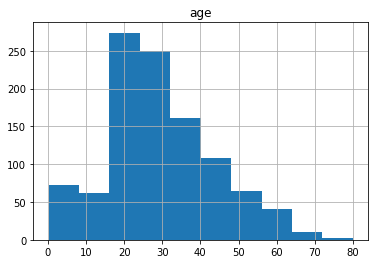

In [87]:
histogram = titanic.hist()

John Hickman Module 6 Checkpoint #1 